REGRESSION MODEL-TO PREDICT THE Next_Tmax

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("temperature_forecast.csv")
df=pd.DataFrame(data)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


EDA PROCESS

In [3]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [5]:
df.drop([7750,7751],axis=0,inplace=True)

In [6]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [7]:
list=[ 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Next_Tmax', 'Next_Tmin']
for val in list:
    df[val]=df[val].replace(np.NaN,df[val].mean())
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,30-08-2017,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,...,0.0,0.0,0.0,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7
7746,22.0,30-08-2017,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,...,0.0,0.0,0.0,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.0,0.0,0.0,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.0,0.0,0.0,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8


In [8]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [9]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [10]:
df["Date"]=pd.to_datetime(df["Date"])

In [11]:
df['month']=df['Date'].dt.month
df["date"]=df["Date"].dt.day
df["year"]=df["Date"].dt.year
df.drop("Date",axis=1,inplace=True)

In [12]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'month', 'date', 'year'],
      dtype='object')

In [13]:
df.groupby("year")["Next_Tmax"].mean()

year
2013    30.152791
2014    29.611920
2015    30.365744
2016    31.251178
2017    29.995552
Name: Next_Tmax, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Next_Tmax'>

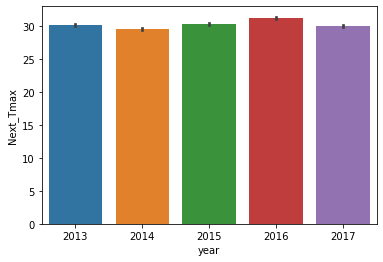

In [14]:
sns.barplot(x="year",y="Next_Tmax",data=df)

In [15]:
df.groupby("year")["Next_Tmin"].mean()

year
2013    23.704386
2014    21.963376
2015    22.359266
2016    23.495870
2017    23.141286
Name: Next_Tmin, dtype: float64

<AxesSubplot:xlabel='year', ylabel='Next_Tmin'>

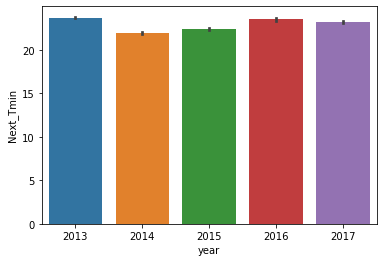

In [16]:
sns.barplot(x="year",y="Next_Tmin",data=df)

In [17]:
df.groupby("month")["Next_Tmax"].mean()

month
1     30.132000
2     29.987003
3     30.856702
4     31.306800
5     30.995902
6     30.819668
7     30.286620
8     29.832962
9     30.185003
10    32.170702
11    30.718203
12    29.617600
Name: Next_Tmax, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Next_Tmax'>

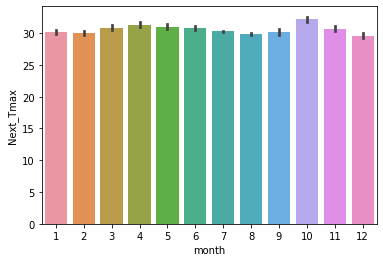

In [18]:
sns.barplot(x="month",y="Next_Tmax",data=df)

In [19]:
df.groupby("month")["Next_Tmin"].mean()

month
1     23.090000
2     22.764263
3     23.047331
4     23.447200
5     22.765331
6     22.662221
7     23.497282
8     22.202798
9     23.326663
10    23.204131
11    23.405063
12    23.125200
Name: Next_Tmin, dtype: float64

<AxesSubplot:xlabel='month', ylabel='Next_Tmin'>

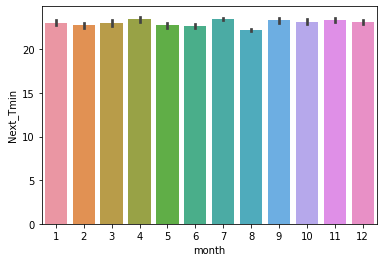

In [20]:
sns.barplot(x="month",y="Next_Tmin",data=df)

array([[<AxesSubplot:title={'center':'station'}>,
        <AxesSubplot:title={'center':'Present_Tmax'}>,
        <AxesSubplot:title={'center':'Present_Tmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmax'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmax_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmin_lapse'}>],
       [<AxesSubplot:title={'center':'LDAPS_WS'}>,
        <AxesSubplot:title={'center':'LDAPS_LH'}>,
        <AxesSubplot:title={'center':'LDAPS_CC1'}>,
        <AxesSubplot:title={'center':'LDAPS_CC2'}>,
        <AxesSubplot:title={'center':'LDAPS_CC3'}>,
        <AxesSubplot:title={'center':'LDAPS_CC4'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT1'}>],
       [<AxesSubplot:title={'center':'LDAPS_PPT2'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT3'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT4'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}>

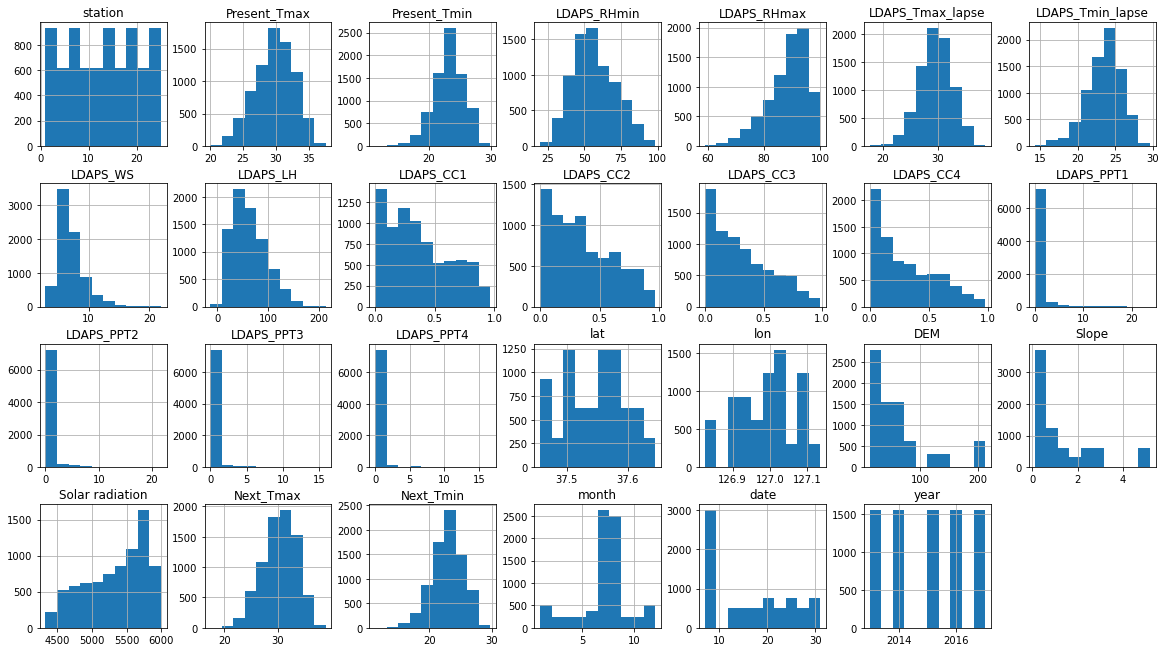

In [21]:
df.hist(figsize=(20,20),grid=True,layout=(7,7))

In [22]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,date,year
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,...,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,13.000000,29.768464,23.225742,56.758747,88.377125,29.613845,23.512997,7.096501,62.495273,0.368744,...,37.544720,126.991400,61.854944,1.256692,5341.549330,30.275437,22.932837,7.080645,16.370968,2015.000000
std,7.211568,2.953516,2.398327,14.585101,7.149011,2.928357,2.330881,2.166519,33.516382,0.261096,...,0.050335,0.079406,54.256953,1.369833,428.996445,3.117994,2.478851,2.238364,8.241331,1.414305
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000,11.300000,1.000000,7.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.048225,84.318649,27.693733,22.115268,5.686498,37.547426,0.148339,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,7.000000,8.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,6.563068,57.310630,0.320110,...,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,7.000000,16.000000,2015.000000
75%,19.000000,32.000000,24.875000,67.032715,93.703491,31.682567,25.133460,8.005363,83.891182,0.571665,...,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,8.000000,24.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000,29.800000,12.000000,31.000000,2017.000000


In [23]:
df.skew()

station             0.000000
Present_Tmax       -0.263016
Present_Tmin       -0.357573
LDAPS_RHmin         0.300230
LDAPS_RHmax        -0.850666
LDAPS_Tmax_lapse   -0.224211
LDAPS_Tmin_lapse   -0.579038
LDAPS_WS            1.556441
LDAPS_LH            0.667591
LDAPS_CC1           0.459196
LDAPS_CC2           0.471968
LDAPS_CC3           0.640094
LDAPS_CC4           0.665834
LDAPS_PPT1          5.324449
LDAPS_PPT2          5.713292
LDAPS_PPT3          6.368744
LDAPS_PPT4          6.743282
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.335958
Next_Tmin          -0.396876
month              -0.705241
date                0.245482
year                0.000000
dtype: float64

station               AxesSubplot(0.125,0.787927;0.0945122x0.0920732)
Present_Tmax        AxesSubplot(0.238415,0.787927;0.0945122x0.0920...
Present_Tmin        AxesSubplot(0.351829,0.787927;0.0945122x0.0920...
LDAPS_RHmin         AxesSubplot(0.465244,0.787927;0.0945122x0.0920...
LDAPS_RHmax         AxesSubplot(0.578659,0.787927;0.0945122x0.0920...
LDAPS_Tmax_lapse    AxesSubplot(0.692073,0.787927;0.0945122x0.0920...
LDAPS_Tmin_lapse    AxesSubplot(0.805488,0.787927;0.0945122x0.0920...
LDAPS_WS              AxesSubplot(0.125,0.677439;0.0945122x0.0920732)
LDAPS_LH            AxesSubplot(0.238415,0.677439;0.0945122x0.0920...
LDAPS_CC1           AxesSubplot(0.351829,0.677439;0.0945122x0.0920...
LDAPS_CC2           AxesSubplot(0.465244,0.677439;0.0945122x0.0920...
LDAPS_CC3           AxesSubplot(0.578659,0.677439;0.0945122x0.0920...
LDAPS_CC4           AxesSubplot(0.692073,0.677439;0.0945122x0.0920...
LDAPS_PPT1          AxesSubplot(0.805488,0.677439;0.0945122x0.0920...
LDAPS_PPT2          

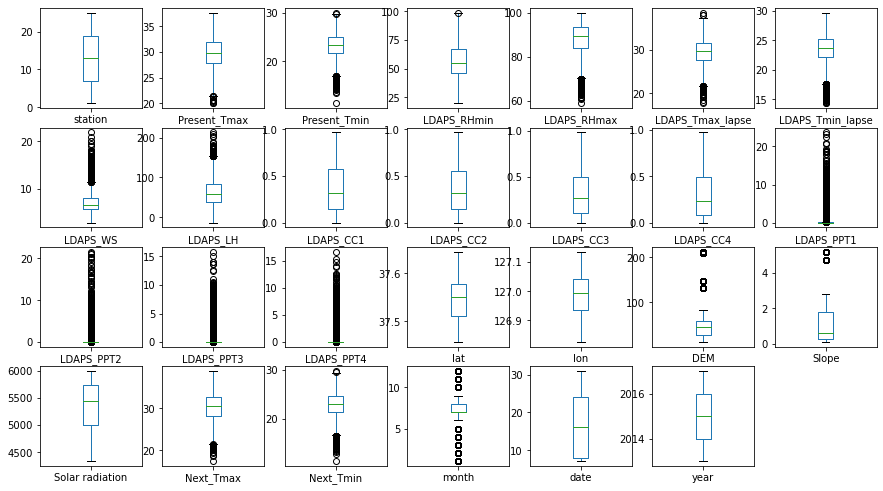

In [24]:
df.plot(kind="box",subplots=True,layout=(7,7),figsize=(15,15))

Z SCORE METHOD

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.66410059, 0.36178319, 0.7613058 , ..., 0.4828147 , 1.65384838,
        1.41421356],
       [1.52542554, 0.72174111, 0.67790895, ..., 0.4828147 , 1.65384838,
        1.41421356],
       [1.38675049, 0.6201607 , 0.03096434, ..., 0.4828147 , 1.65384838,
        1.41421356],
       ...,
       [1.38675049, 2.19023044, 2.55433823, ..., 0.41075281, 1.65384838,
        1.41421356],
       [1.52542554, 2.19023044, 2.30414766, ..., 0.41075281, 1.65384838,
        1.41421356],
       [1.66410059, 2.22409058, 2.42924295, ..., 0.41075281, 1.65384838,
        1.41421356]])

In [26]:
df_new=df[(z<3).all(axis=1)]
df_new

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,date,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6,30,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6,30,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6,30,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6,30,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6,30,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,8,30,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,8,30,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,8,30,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,8,30,2017


In [28]:
df.shape

(7750, 27)

In [29]:
6888/7750

0.888774193548387

In [30]:
df.skew()

station             0.000000
Present_Tmax       -0.263016
Present_Tmin       -0.357573
LDAPS_RHmin         0.300230
LDAPS_RHmax        -0.850666
LDAPS_Tmax_lapse   -0.224211
LDAPS_Tmin_lapse   -0.579038
LDAPS_WS            1.556441
LDAPS_LH            0.667591
LDAPS_CC1           0.459196
LDAPS_CC2           0.471968
LDAPS_CC3           0.640094
LDAPS_CC4           0.665834
LDAPS_PPT1          5.324449
LDAPS_PPT2          5.713292
LDAPS_PPT3          6.368744
LDAPS_PPT4          6.743282
lat                 0.086942
lon                -0.285300
DEM                 1.723944
Slope               1.563346
Solar radiation    -0.511006
Next_Tmax          -0.335958
Next_Tmin          -0.396876
month              -0.705241
date                0.245482
year                0.000000
dtype: float64

In [31]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'month', 'date', 'year'],
      dtype='object')

In [32]:
list=['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'month', 'date', 'year']
for i in list:
    vc=df_new[i].value_counts()
    print(vc)

9.0     284
23.0    284
8.0     284
24.0    283
19.0    282
22.0    282
11.0    282
18.0    281
13.0    280
15.0    280
6.0     279
12.0    279
5.0     278
16.0    277
21.0    276
2.0     275
25.0    275
14.0    275
7.0     273
4.0     271
3.0     270
10.0    266
1.0     262
20.0    256
17.0    254
Name: station, dtype: int64
29.4    104
31.4    101
29.1    101
31.9     99
29.7     98
       ... 
21.4      1
37.1      1
21.2      1
36.3      1
37.6      1
Name: Present_Tmax, Length: 159, dtype: int64
23.8    138
24.0    137
23.3    134
23.7    130
23.5    125
       ... 
29.6      1
29.9      1
29.1      1
29.7      1
16.3      1
Name: Present_Tmin, Length: 135, dtype: int64
56.758747    75
77.030350     2
71.658089     2
51.810596     2
49.358723     1
             ..
75.593842     1
42.719604     1
62.735111     1
39.995705     1
71.359451     1
Name: LDAPS_RHmin, Length: 6811, dtype: int64
88.377125    75
91.878174     2
92.531029     2
94.795967     2
91.776146     2
             .

USING LOG TRANSFORM METHOD TO REMOVE SKEWNESS

In [33]:
skew=( "LDAPS_RHmax","LDAPS_Tmin_lapse",'LDAPS_WS','LDAPS_LH','LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4',"DEM","Slope","month")
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [34]:
df.skew()

station             0.000000
Present_Tmax       -0.263016
Present_Tmin       -0.357573
LDAPS_RHmin         0.300230
LDAPS_RHmax        -0.850666
LDAPS_Tmax_lapse   -0.224211
LDAPS_Tmin_lapse   -0.579038
LDAPS_WS            0.680004
LDAPS_LH           -0.630799
LDAPS_CC1           0.459196
LDAPS_CC2           0.471968
LDAPS_CC3           0.384528
LDAPS_CC4           0.440162
LDAPS_PPT1          2.737468
LDAPS_PPT2          3.167950
LDAPS_PPT3          3.989823
LDAPS_PPT4          4.205659
lat                 0.086942
lon                -0.285300
DEM                 0.443948
Slope               0.836180
Solar radiation    -0.511006
Next_Tmax          -0.335958
Next_Tmin          -0.396876
month              -0.705241
date                0.245482
year                0.000000
dtype: float64

In [35]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            3
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
month               0
date                0
year                0
dtype: int64

In [36]:
df["LDAPS_LH"]=df["LDAPS_LH"].replace(np.NaN,df["LDAPS_LH"].mean())

CORRELATION GRAPH

In [38]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,date,year
station,1.000000e+00,0.112786,0.131921,-0.066796,-0.167196,0.069223,0.104911,0.010839,-0.130979,0.006922,...,-2.376097e-01,-1.187626e-01,-3.054614e-01,-1.214864e-01,-0.019011,0.108154,0.128539,9.230762e-18,-7.467287e-18,0.000000e+00
Present_Tmax,1.127859e-01,1.000000,0.617699,-0.207063,-0.304831,0.568959,0.622540,-0.116209,0.099849,-0.313700,...,-5.413227e-02,7.526751e-03,-1.625509e-01,-1.112309e-01,-0.027008,0.609320,0.621706,-1.152107e-03,-1.439736e-01,5.986973e-02
Present_Tmin,1.319212e-01,0.617699,1.000000,0.120862,-0.018413,0.462183,0.762220,-0.019430,-0.018842,0.082933,...,-8.051962e-02,-4.555983e-02,-2.560110e-01,-1.603926e-01,0.051659,0.469903,0.795860,-3.441490e-03,-1.084986e-01,3.747517e-02
LDAPS_RHmin,-6.679610e-02,-0.207063,0.120862,1.000000,0.578472,-0.568528,0.087426,0.268814,0.012924,0.613375,...,8.590934e-02,-7.769602e-02,7.762334e-02,1.111637e-01,0.243102,-0.441382,0.092732,-5.399132e-02,-6.589936e-02,-2.046436e-03
LDAPS_RHmax,-1.671955e-01,-0.304831,-0.018413,0.578472,1.000000,-0.377319,-0.117110,0.113867,0.295931,0.436177,...,1.947819e-01,2.422561e-02,1.744130e-01,2.125800e-01,0.147952,-0.287320,-0.075298,-4.003864e-02,-1.302202e-02,-1.420113e-01
LDAPS_Tmax_lapse,6.922327e-02,0.568959,0.462183,-0.568528,-0.377319,1.000000,0.652948,-0.278864,-0.026043,-0.441029,...,-4.389584e-02,8.905060e-02,-1.483845e-01,-1.497547e-01,0.046231,0.826630,0.585411,-2.172562e-02,-1.605902e-01,1.619933e-02
LDAPS_Tmin_lapse,1.049107e-01,0.622540,0.762220,0.087426,-0.117110,0.652948,1.000000,-0.102385,-0.148434,0.009424,...,-9.801410e-02,-2.843003e-02,-1.954547e-01,-1.853346e-01,0.158568,0.585728,0.879809,-2.753489e-02,-1.782129e-01,-4.700245e-03
LDAPS_WS,1.083948e-02,-0.116209,-0.019430,0.268814,0.113867,-0.278864,-0.102385,1.000000,-0.004347,0.271982,...,1.858415e-02,-6.638893e-02,1.552728e-01,1.475665e-01,0.137597,-0.313164,-0.068820,-8.321417e-02,-3.614946e-02,-1.121528e-01
LDAPS_LH,-1.309791e-01,0.099849,-0.018842,0.012924,0.295931,-0.026043,-0.148434,-0.004347,1.000000,-0.070903,...,8.261360e-02,2.666235e-03,8.755015e-02,1.254967e-01,-0.044981,0.101001,-0.069891,-3.217817e-02,-3.327860e-03,3.261448e-02
LDAPS_CC1,6.922023e-03,-0.313700,0.082933,0.613375,0.436177,-0.441029,0.009424,0.271982,-0.070903,1.000000,...,-9.048002e-03,-7.764004e-03,-1.649845e-02,-2.155077e-02,0.217643,-0.455046,-0.012730,-7.630818e-02,-2.014703e-02,-6.650906e-02


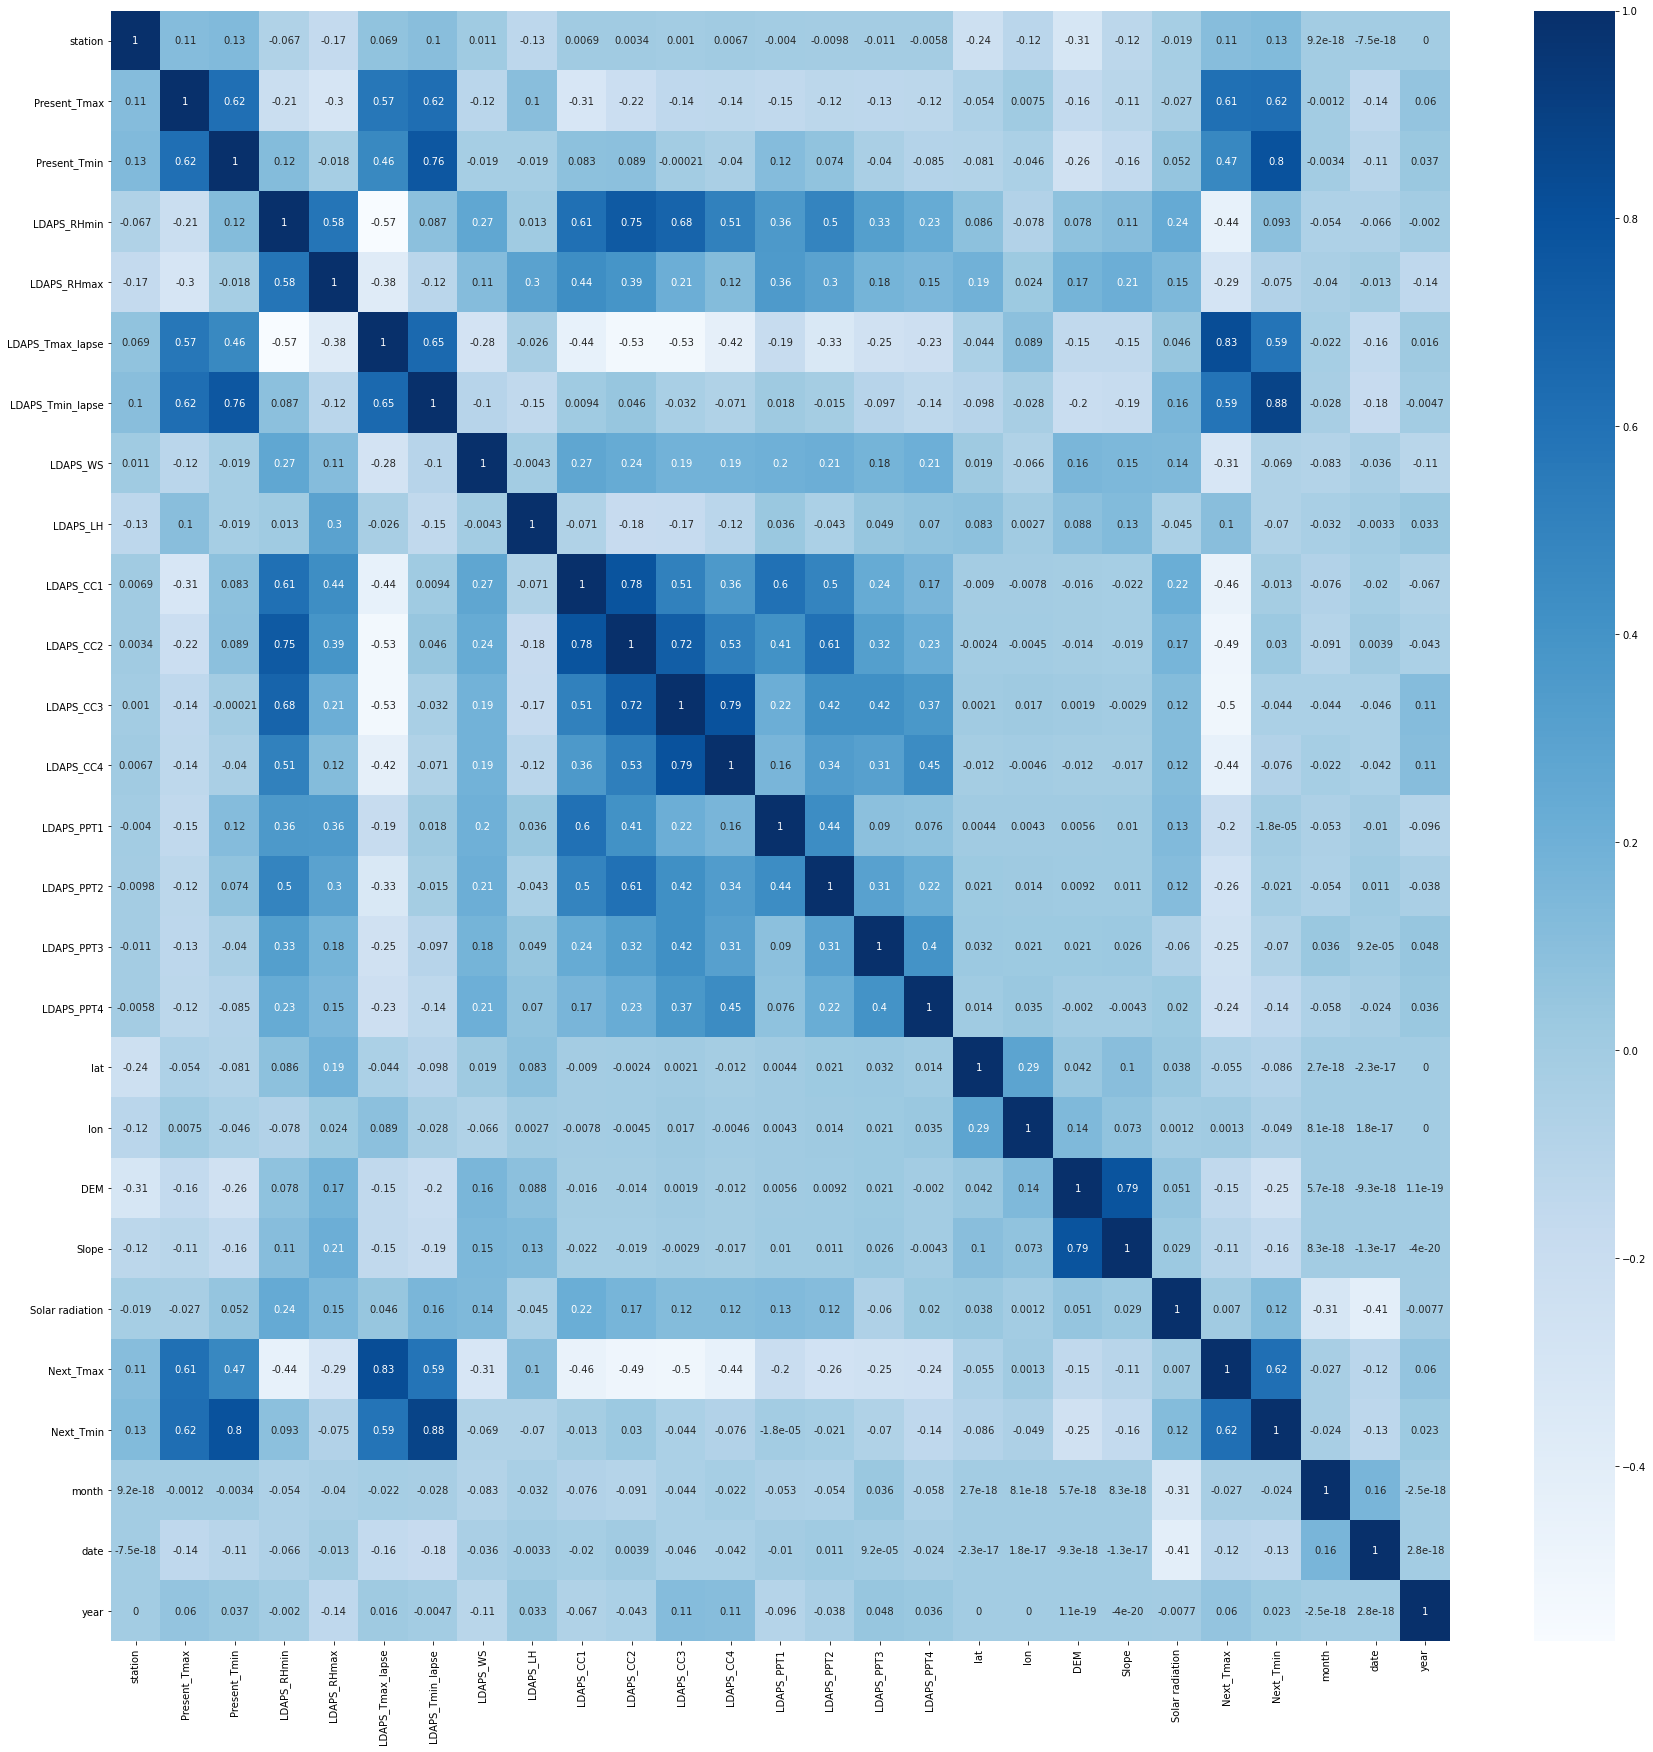

In [39]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,df.columns != 'Next_Tmax']
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin,month,date,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.233947,...,0.0,37.6046,126.991,5.362864,1.331046,5992.895996,21.2,6,30,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.225508,...,0.0,37.6046,127.032,3.823463,0.414821,5869.312500,22.5,6,30,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.209344,...,0.0,37.5776,127.058,3.535344,0.235941,5863.555664,23.9,6,30,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.216372,...,0.0,37.6450,127.022,3.844087,1.262657,5856.964844,24.3,6,30,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.151407,...,0.0,37.5507,127.135,3.584574,0.409125,5859.552246,22.5,6,30,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.028576,2.362181,0.052902,...,0.0,37.5507,127.040,3.306813,0.452412,4456.024414,17.7,8,30,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.912218,4.420607,0.066461,...,0.0,37.5102,127.086,3.134050,0.125045,4441.803711,17.1,8,30,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.966961,4.291258,0.030034,...,0.0,37.5372,126.891,2.808655,0.144447,4443.313965,18.1,8,30,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.020596,3.876219,0.035874,...,0.0,37.5237,126.909,2.906661,0.200734,4438.373535,18.8,8,30,2017


In [41]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [42]:
calc_vif(x)

,variable,VIF factor
0,station,5.384775e+00
1,Present_Tmax,2.875190e+02
2,Present_Tmin,3.297719e+02
3,LDAPS_RHmin,1.069935e+02
4,LDAPS_RHmax,3.586051e+02
5,LDAPS_Tmax_lapse,7.942344e+02
6,LDAPS_Tmin_lapse,9.202260e+02
7,LDAPS_WS,9.403646e+01
8,LDAPS_LH,6.714804e+01
9,LDAPS_CC1,1.190707e+01


In [50]:
df1=df.drop(["LDAPS_RHmin",'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3'],axis=1)

In [51]:
x=df1.iloc[:,1:]
x

,Present_Tmax,Present_Tmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,date,year
0,28.7,21.4,91.116364,28.074101,23.006936,2.056542,4.254929,0.123039,0.0,0.0,...,37.6046,126.991,5.362864,1.331046,5992.895996,29.1,21.2,6,30,2013
1,31.9,21.6,90.604721,29.850689,24.035009,1.900896,3.969111,0.120204,0.0,0.0,...,37.6046,127.032,3.823463,0.414821,5869.312500,30.5,22.5,6,30,2013
2,31.6,23.3,83.973587,30.091292,24.565633,1.965464,3.071445,0.132891,0.0,0.0,...,37.5776,127.058,3.535344,0.235941,5863.555664,31.1,23.9,6,30,2013
3,32.0,23.4,96.483688,29.704629,23.326177,1.894624,4.200612,0.125970,0.0,0.0,...,37.6450,127.022,3.844087,1.262657,5856.964844,31.7,24.3,6,30,2013
4,31.4,21.9,90.155128,29.113934,23.486480,1.907318,4.691032,0.157022,0.0,0.0,...,37.5507,127.135,3.584574,0.409125,5859.552246,31.2,22.5,6,30,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,78.261383,27.812697,18.303014,2.028576,2.362181,0.004370,0.0,0.0,...,37.5507,127.040,3.306813,0.452412,4456.024414,27.6,17.7,8,30,2017
7746,22.5,17.4,83.690018,26.704905,17.814038,1.912218,4.420607,0.017523,0.0,0.0,...,37.5102,127.086,3.134050,0.125045,4441.803711,28.0,17.1,8,30,2017
7747,23.3,17.1,78.869858,26.352081,18.775678,1.966961,4.291258,0.000000,0.0,0.0,...,37.5372,126.891,2.808655,0.144447,4443.313965,28.3,18.1,8,30,2017
7748,23.3,17.7,77.294975,27.010193,18.733519,2.020596,3.876219,0.000000,0.0,0.0,...,37.5237,126.909,2.906661,0.200734,4438.373535,28.6,18.8,8,30,2017


In [52]:
calc_vif(x)

,variable,VIF factor
0,Present_Tmax,2.610283e+02
1,Present_Tmin,3.266263e+02
2,LDAPS_RHmax,3.006497e+02
3,LDAPS_Tmax_lapse,5.131043e+02
4,LDAPS_Tmin_lapse,6.825910e+02
5,LDAPS_WS,9.502985e+01
6,LDAPS_LH,6.302278e+01
7,LDAPS_CC4,4.953781e+00
8,LDAPS_PPT1,1.698506e+00
9,LDAPS_PPT2,1.806739e+00


STANDARD SCALER METHOD

In [53]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
x=scale.fit_transform(x)
x

array([[-0.36178319, -0.7613058 ,  0.38318802, ..., -0.4828147 ,
         1.65384838, -1.41421356],
       [ 0.72174111, -0.67790895,  0.31161512, ..., -0.4828147 ,
         1.65384838, -1.41421356],
       [ 0.6201607 ,  0.03096434, -0.61600434, ..., -0.4828147 ,
         1.65384838, -1.41421356],
       ...,
       [-2.19023044, -2.55433823, -1.32995741, ...,  0.41075281,
         1.65384838,  1.41421356],
       [-2.19023044, -2.30414766, -1.55026538, ...,  0.41075281,
         1.65384838,  1.41421356],
       [-2.22409058, -2.42924295, -1.55743206, ...,  0.41075281,
         1.65384838,  1.41421356]])

In [56]:
y=df1.iloc[:,18]
y

0       29.1
1       30.5
2       31.1
3       31.7
4       31.2
        ... 
7745    27.6
7746    28.0
7747    28.3
7748    28.6
7749    27.8
Name: Next_Tmax, Length: 7750, dtype: float64

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [57]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=DecisionTreeRegressor()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.9999941239033229 on random state 191


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=191)

In [59]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 1.0
training score= 1.0
error= 5.969432087320522e-15 

testing score= 0.9999950261293679
training score= 1.0
error= 0.006878359394288 

testing score= 0.9918943023814749
training score= 0.9956640201614168
error= 0.27178572796269884 

testing score= 0.9999862339832251
training score= 0.9999794700868265
error= 0.011449862655888824 

testing score= 0.9038668494469173
training score= 0.9501461558082156
error= 0.8850904811020052 



CROSS VALIDATION PROCESS

In [60]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [1. 1. 1. 1. 1.]
mean_score= 1.0
std= 0.0 

score= [0.99999912 0.99999124 0.99999907 0.99833923 0.99999016]
mean_score= 0.9996637620113267
std= 0.0006622785010328266 

score= [0.94890095 0.95186602 0.98804618 0.93722042 0.95441705]
mean_score= 0.956090121950937
std= 0.0170269287041165 

score= [0.99999915 0.99998984 0.99999972 0.99838796 0.99995907]
mean_score= 0.9996671484905931
std= 0.00063976610020519 

score= [0.6769111  0.62393249 0.74120675 0.84060507 0.71837746]
mean_score= 0.720206572921685
std= 0.07222651622055037 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
parameters={"fit_intercept":[True,False],"normalize":[True,False],"n_jobs": np.arange(2,10),"copy_X":[True,False]}

In [63]:
gcv=GridSearchCV(LinearRegression(),parameters,cv=5)

In [64]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'normalize': [True, False]})

In [65]:
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'normalize': True}

In [66]:
final_model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=True)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

1.0
score= 1.0
4.6883779841306384e-15


SAVING THE BEST MODEL

In [67]:
import joblib

joblib.dump(final_model,"temp_forecast_Next_Tmax.obj")

['temp_forecast_Next_Tmax.obj']

In [68]:
temp_forecast_Next_Tmax_from_joblib=joblib.load("temp_forecast_Next_Tmax.obj")
temp_forecast_Next_Tmax_from_joblib.predict(x_test)

array([33.3, 27.5, 31.8, ..., 29.6, 27.7, 30.6])

REGRESSION MODEL-TO PREDICT THE Next_Tmin

In [69]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,date,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.233947,...,37.6046,126.991,5.362864,1.331046,5992.895996,29.1,21.2,6,30,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.225508,...,37.6046,127.032,3.823463,0.414821,5869.312500,30.5,22.5,6,30,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.209344,...,37.5776,127.058,3.535344,0.235941,5863.555664,31.1,23.9,6,30,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.216372,...,37.6450,127.022,3.844087,1.262657,5856.964844,31.7,24.3,6,30,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.151407,...,37.5507,127.135,3.584574,0.409125,5859.552246,31.2,22.5,6,30,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.028576,2.362181,0.052902,...,37.5507,127.040,3.306813,0.452412,4456.024414,27.6,17.7,8,30,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.912218,4.420607,0.066461,...,37.5102,127.086,3.134050,0.125045,4441.803711,28.0,17.1,8,30,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.966961,4.291258,0.030034,...,37.5372,126.891,2.808655,0.144447,4443.313965,28.3,18.1,8,30,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.020596,3.876219,0.035874,...,37.5237,126.909,2.906661,0.200734,4438.373535,28.6,18.8,8,30,2017


CORRELATION GRAPH

In [83]:
df.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,date,year
station,1.000000e+00,0.112786,0.131921,-0.066796,-0.167196,0.069223,0.104911,0.010839,-0.130979,0.006922,...,-2.376097e-01,-1.187626e-01,-3.054614e-01,-1.214864e-01,-0.019011,0.108154,0.128539,9.230762e-18,-7.467287e-18,0.000000e+00
Present_Tmax,1.127859e-01,1.000000,0.617699,-0.207063,-0.304831,0.568959,0.622540,-0.116209,0.099849,-0.313700,...,-5.413227e-02,7.526751e-03,-1.625509e-01,-1.112309e-01,-0.027008,0.609320,0.621706,-1.152107e-03,-1.439736e-01,5.986973e-02
Present_Tmin,1.319212e-01,0.617699,1.000000,0.120862,-0.018413,0.462183,0.762220,-0.019430,-0.018842,0.082933,...,-8.051962e-02,-4.555983e-02,-2.560110e-01,-1.603926e-01,0.051659,0.469903,0.795860,-3.441490e-03,-1.084986e-01,3.747517e-02
LDAPS_RHmin,-6.679610e-02,-0.207063,0.120862,1.000000,0.578472,-0.568528,0.087426,0.268814,0.012924,0.613375,...,8.590934e-02,-7.769602e-02,7.762334e-02,1.111637e-01,0.243102,-0.441382,0.092732,-5.399132e-02,-6.589936e-02,-2.046436e-03
LDAPS_RHmax,-1.671955e-01,-0.304831,-0.018413,0.578472,1.000000,-0.377319,-0.117110,0.113867,0.295931,0.436177,...,1.947819e-01,2.422561e-02,1.744130e-01,2.125800e-01,0.147952,-0.287320,-0.075298,-4.003864e-02,-1.302202e-02,-1.420113e-01
LDAPS_Tmax_lapse,6.922327e-02,0.568959,0.462183,-0.568528,-0.377319,1.000000,0.652948,-0.278864,-0.026043,-0.441029,...,-4.389584e-02,8.905060e-02,-1.483845e-01,-1.497547e-01,0.046231,0.826630,0.585411,-2.172562e-02,-1.605902e-01,1.619933e-02
LDAPS_Tmin_lapse,1.049107e-01,0.622540,0.762220,0.087426,-0.117110,0.652948,1.000000,-0.102385,-0.148434,0.009424,...,-9.801410e-02,-2.843003e-02,-1.954547e-01,-1.853346e-01,0.158568,0.585728,0.879809,-2.753489e-02,-1.782129e-01,-4.700245e-03
LDAPS_WS,1.083948e-02,-0.116209,-0.019430,0.268814,0.113867,-0.278864,-0.102385,1.000000,-0.004347,0.271982,...,1.858415e-02,-6.638893e-02,1.552728e-01,1.475665e-01,0.137597,-0.313164,-0.068820,-8.321417e-02,-3.614946e-02,-1.121528e-01
LDAPS_LH,-1.309791e-01,0.099849,-0.018842,0.012924,0.295931,-0.026043,-0.148434,-0.004347,1.000000,-0.070903,...,8.261360e-02,2.666235e-03,8.755015e-02,1.254967e-01,-0.044981,0.101001,-0.069891,-3.217817e-02,-3.327860e-03,3.261448e-02
LDAPS_CC1,6.922023e-03,-0.313700,0.082933,0.613375,0.436177,-0.441029,0.009424,0.271982,-0.070903,1.000000,...,-9.048002e-03,-7.764004e-03,-1.649845e-02,-2.155077e-02,0.217643,-0.455046,-0.012730,-7.630818e-02,-2.014703e-02,-6.650906e-02


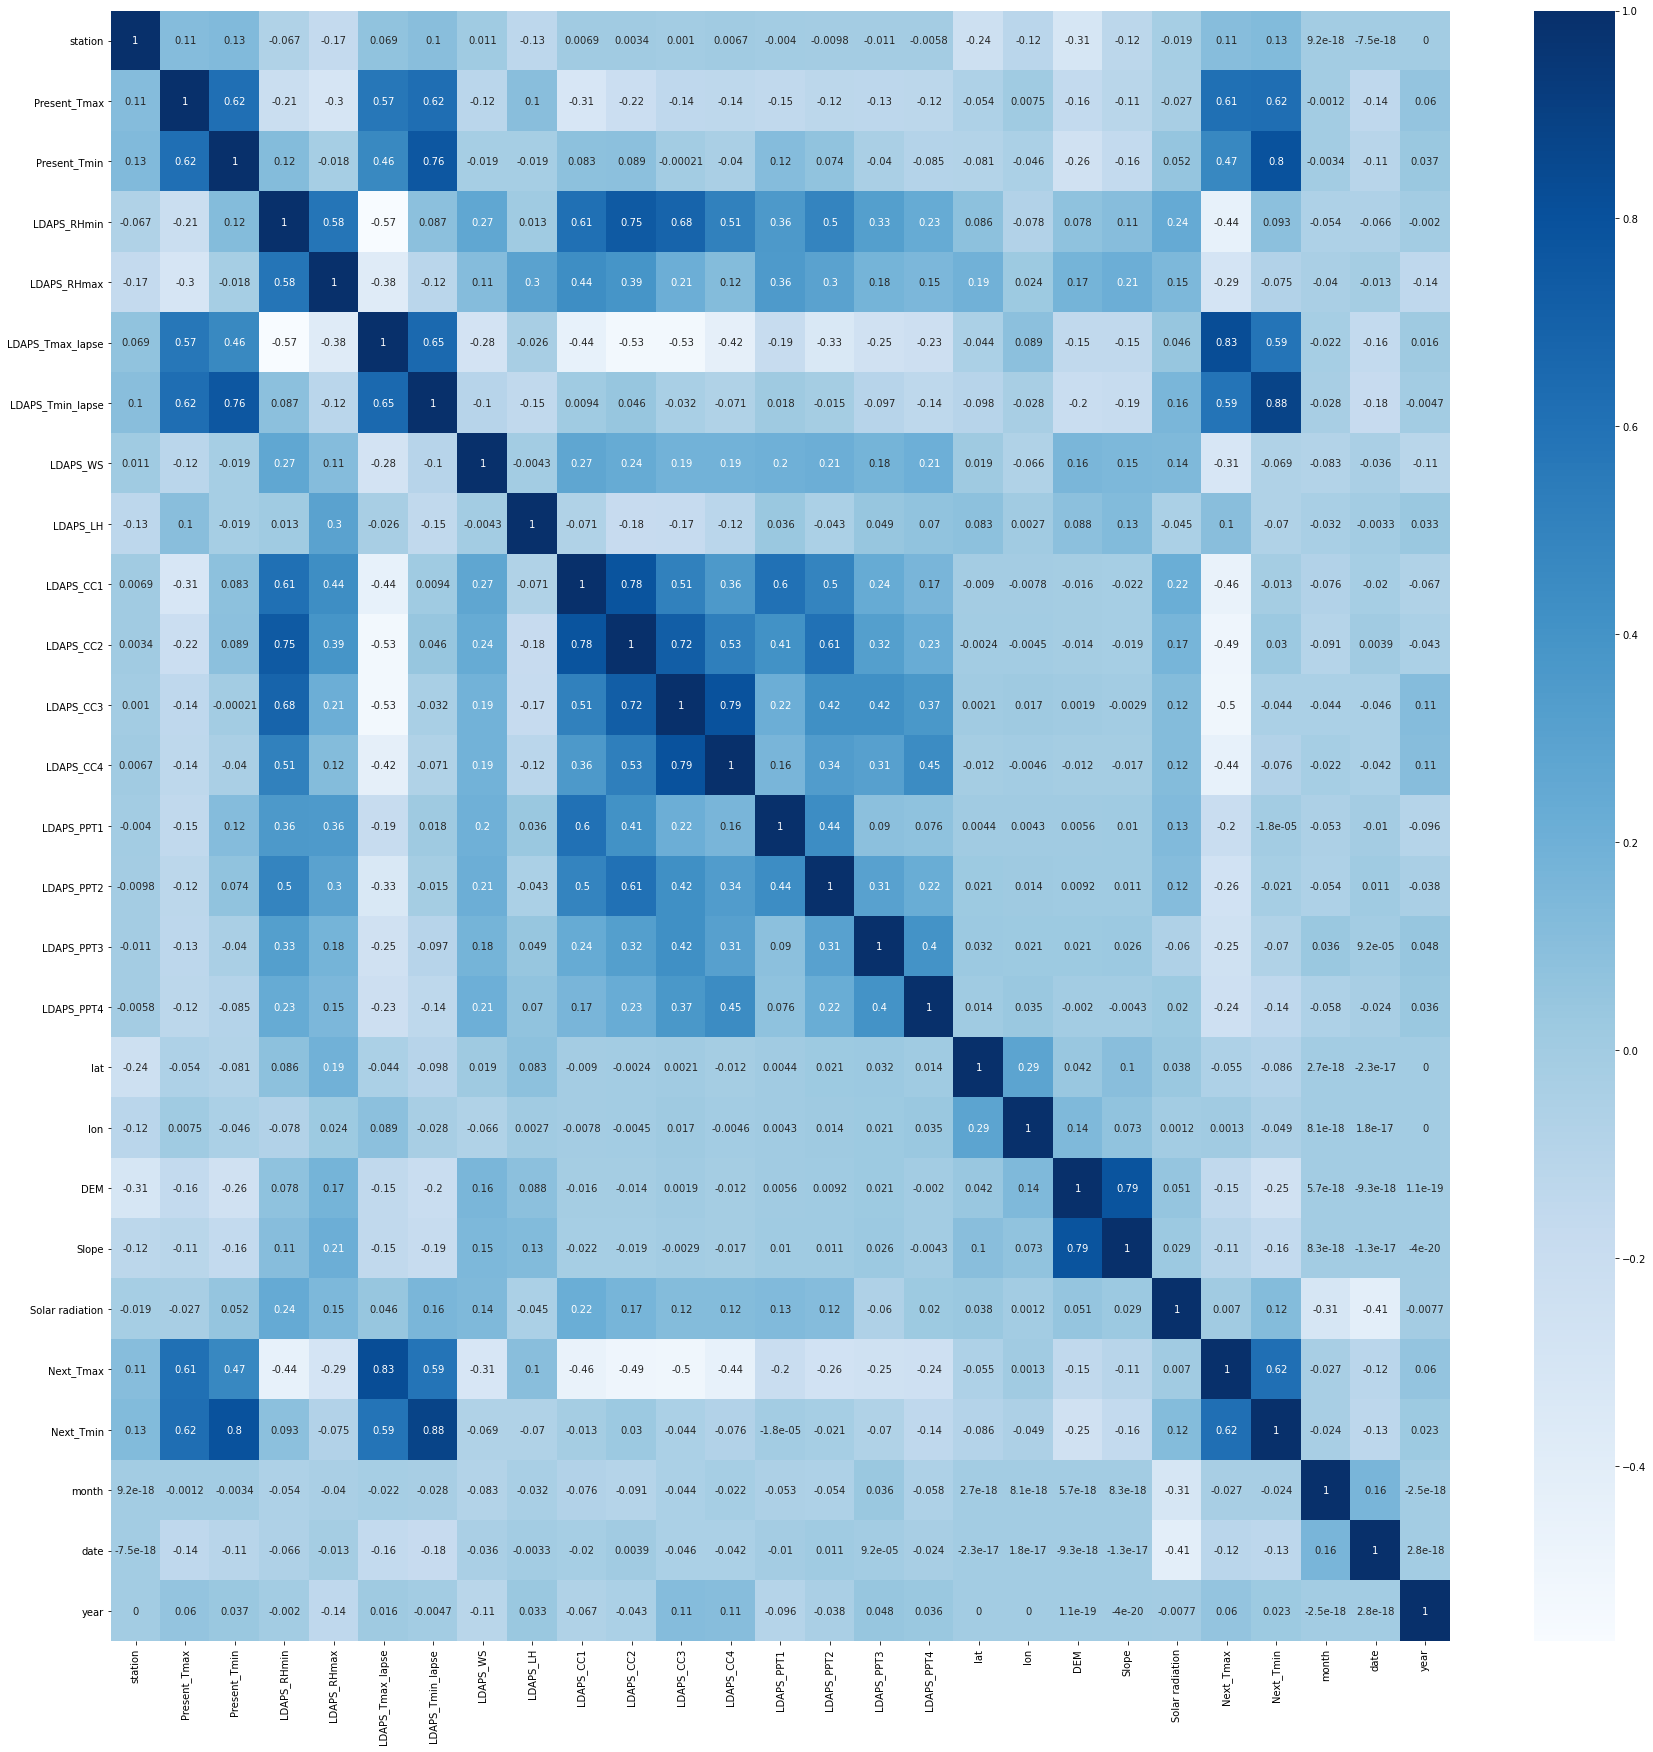

In [71]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [113]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,df.columns != 'Next_Tmin']
x

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,month,date,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,2.056542,4.254929,0.233947,...,0.0,37.6046,126.991,5.362864,1.331046,5992.895996,29.1,6,30,2013
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,1.900896,3.969111,0.225508,...,0.0,37.6046,127.032,3.823463,0.414821,5869.312500,30.5,6,30,2013
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,1.965464,3.071445,0.209344,...,0.0,37.5776,127.058,3.535344,0.235941,5863.555664,31.1,6,30,2013
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,1.894624,4.200612,0.216372,...,0.0,37.6450,127.022,3.844087,1.262657,5856.964844,31.7,6,30,2013
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,1.907318,4.691032,0.151407,...,0.0,37.5507,127.135,3.584574,0.409125,5859.552246,31.2,6,30,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,21.0,23.1,17.8,24.688997,78.261383,27.812697,18.303014,2.028576,2.362181,0.052902,...,0.0,37.5507,127.040,3.306813,0.452412,4456.024414,27.6,8,30,2017
7746,22.0,22.5,17.4,30.094858,83.690018,26.704905,17.814038,1.912218,4.420607,0.066461,...,0.0,37.5102,127.086,3.134050,0.125045,4441.803711,28.0,8,30,2017
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,1.966961,4.291258,0.030034,...,0.0,37.5372,126.891,2.808655,0.144447,4443.313965,28.3,8,30,2017
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,2.020596,3.876219,0.035874,...,0.0,37.5237,126.909,2.906661,0.200734,4438.373535,28.6,8,30,2017


In [114]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [115]:
calc_vif(x)

,variable,VIF factor
0,station,5.429884e+00
1,Present_Tmax,2.954437e+02
2,Present_Tmin,2.970887e+02
3,LDAPS_RHmin,1.065655e+02
4,LDAPS_RHmax,3.579440e+02
5,LDAPS_Tmax_lapse,9.391615e+02
6,LDAPS_Tmin_lapse,7.344272e+02
7,LDAPS_WS,9.627912e+01
8,LDAPS_LH,6.812068e+01
9,LDAPS_CC1,1.200841e+01


STANDARD SCALER METHOD

In [116]:
from sklearn.preprocessing import StandardScaler          
scale=StandardScaler()                                    
x=scale.fit_transform(x)
x.shape

(7750, 26)

In [117]:
y=df.iloc[:,23]
y

0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7745    17.7
7746    17.1
7747    18.1
7748    18.8
7749    17.4
Name: Next_Tmin, Length: 7750, dtype: float64

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [118]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i) 
    m=DecisionTreeRegressor()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=r2_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.8260869386481922 on random state 82


In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=82)

In [120]:
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",r2_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    mse=mean_squared_error(pred_test,y_test)
    rmse=math.sqrt(mse)
    print("error=",rmse,"\n")

testing score= 0.833672926435109
training score= 0.8473587862992701
error= 0.9413539915086239 

testing score= 0.8176086318864256
training score= 1.0
error= 1.0844978414990458 

testing score= 0.9135395199100976
training score= 0.9384084339518753
error= 0.6845161138493716 

testing score= 0.9041286239268514
training score= 0.9867135240779397
error= 0.7268118873293803 

testing score= 0.8507595357683309
training score= 0.9212552975640621
error= 0.8620269236720909 



CROSS VALIDATION PROCESS

In [121]:
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor(),KNeighborsRegressor()]
for i in model:
    score=cross_val_score(i,x,y,cv=5) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.70397272 0.66333384 0.81962924 0.88897448 0.87486631]
mean_score= 0.7901553165498663
std= 0.09090766530292549 

score= [0.32904828 0.46227612 0.63602645 0.77471114 0.65367024]
mean_score= 0.5711464462226522
std= 0.15679441730330232 

score= [0.5378382  0.66366182 0.80395776 0.83438869 0.81622728]
mean_score= 0.7312147491030796
std= 0.11412398797149262 

score= [0.68468867 0.68208914 0.82053161 0.87134138 0.87410294]
mean_score= 0.7865507478323657
std= 0.08636856637416768 

score= [0.37410922 0.43000054 0.62592963 0.71570628 0.78486312]
mean_score= 0.5861217588304257
std= 0.15949802092780332 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
parameters={"fit_intercept":[True,False],"normalize":[True,False],"n_jobs": np.arange(2,10),"copy_X":[True,False]}

In [124]:
gcv=GridSearchCV(LinearRegression(),parameters,cv=5)

In [125]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'normalize': [True, False]})

In [126]:
gcv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 2, 'normalize': True}

In [127]:
final_model=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=True)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(r2_score(pred,y_test))
print("score=",final_model.score(x_train,y_train))
mse=mean_squared_error(pred,y_test)
rmse=math.sqrt(mse)
print(rmse)

0.8336729264351096
score= 0.8473587862992701
0.9413539915086236


SAVING THE BEST MODEL

In [128]:
import joblib

joblib.dump(final_model,"temp_forecast_Next_Tmin.obj")

['temp_forecast_Next_Tmin.obj']

In [129]:
temp_forecast_Next_Tmin_from_joblib=joblib.load("temp_forecast_Next_Tmin.obj")
temp_forecast_Next_Tmin_from_joblib.predict(x_test)

array([22.44302874, 22.23897681, 20.44606348, ..., 15.96008211,
       25.27055449, 21.0562162 ])